In [1]:
import pandas as pd
df=pd.read_csv('malicious_phish.csv')

print(df.shape)
df.head()


(651191, 2)


,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


# Feature Engineering

In [2]:
import re
#Use of IP or not in domain
def having_ip_address(url):
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}', url)  # Ipv6
    if match:
        # print match.group()
        return 1
    else:
        # print 'No matching pattern found'
        return 0
df['use_of_ip'] = df['url'].apply(lambda i: having_ip_address(i))

In [3]:
from urllib.parse import urlparse

def abnormal_url(url):
    hostname = urlparse(url).hostname
    hostname = str(hostname)
    match = re.search(hostname, url)
    if match:
      
        return 1
    else:
        
        return 0


df['abnormal_url'] = df['url'].apply(lambda i: abnormal_url(i))

In [6]:
!pip install googlesearch-python

In [4]:

from googlesearch import search

def google_index(url):
    site = search(url, 5)
    return 1 if site else 0
df['google_index'] = df['url'].apply(lambda i: google_index(i))

In [5]:
def count_dot(url):
    count_dot = url.count('.')
    return count_dot

df['count.'] = df['url'].apply(lambda i: count_dot(i))
df.head()

,url,type,use_of_ip,abnormal_url,google_index,count.
0,br-icloud.com.br,phishing,0,0,1,2
1,mp3raid.com/music/krizz_kaliko.html,benign,0,0,1,2
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,0,1,2
3,http://www.garage-pirenne.be/index.php?option=...,defacement,0,1,1,3
4,http://adventure-nicaragua.net/index.php?optio...,defacement,0,1,1,2


In [6]:
def count_www(url):
    url.count('www')
    return url.count('www')

df['count-www'] = df['url'].apply(lambda i: count_www(i))

def count_atrate(url):
     
    return url.count('@')

df['count@'] = df['url'].apply(lambda i: count_atrate(i))


def no_of_dir(url):
    urldir = urlparse(url).path
    return urldir.count('/')

df['count_dir'] = df['url'].apply(lambda i: no_of_dir(i))

def no_of_embed(url):
    urldir = urlparse(url).path
    return urldir.count('//')

df['count_embed_domian'] = df['url'].apply(lambda i: no_of_embed(i))


def shortening_service(url):
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',
                      url)
    if match:
        return 1
    else:
        return 0
    
    
df['short_url'] = df['url'].apply(lambda i: shortening_service(i))

<>:28: SyntaxWarning: invalid escape sequence '\.'
<>:29: SyntaxWarning: invalid escape sequence '\.'
<>:30: SyntaxWarning: invalid escape sequence '\.'
<>:31: SyntaxWarning: invalid escape sequence '\.'
<>:32: SyntaxWarning: invalid escape sequence '\.'
<>:33: SyntaxWarning: invalid escape sequence '\.'
<>:34: SyntaxWarning: invalid escape sequence '\.'
<>:35: SyntaxWarning: invalid escape sequence '\.'
<>:28: SyntaxWarning: invalid escape sequence '\.'
<>:29: SyntaxWarning: invalid escape sequence '\.'
<>:30: SyntaxWarning: invalid escape sequence '\.'
<>:31: SyntaxWarning: invalid escape sequence '\.'
<>:32: SyntaxWarning: invalid escape sequence '\.'
<>:33: SyntaxWarning: invalid escape sequence '\.'
<>:34: SyntaxWarning: invalid escape sequence '\.'
<>:35: SyntaxWarning: invalid escape sequence '\.'
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_20044\2589731032.py:28: SyntaxWarning: invalid escape sequence '\.'
  match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|

In [13]:
def count_https(url):
    return url.count('https')

df['count-https'] = df['url'].apply(lambda i : count_https(i))

def count_http(url):
    return url.count('http')

df['count-http'] = df['url'].apply(lambda i : count_http(i))

In [7]:
def count_per(url):
    return url.count('%')

df['count%'] = df['url'].apply(lambda i : count_per(i))

def count_ques(url):
    return url.count('?')

df['count?'] = df['url'].apply(lambda i: count_ques(i))

def count_hyphen(url):
    return url.count('-')

df['count-'] = df['url'].apply(lambda i: count_hyphen(i))

def count_equal(url):
    return url.count('=')
df['count='] = df['url'].apply(lambda i: count_equal(i))

def url_length(url):
    return len(str(url))


#Length of URL
df['url_length'] = df['url'].apply(lambda i: url_length(i))
#Hostname Length

def hostname_length(url):
    return len(urlparse(url).netloc)

df['hostname_length'] = df['url'].apply(lambda i: hostname_length(i))

df.head()

def suspicious_words(url):
    match = re.search('PayPal|login|signin|bank|account|update|free|lucky|service|bonus|ebayisapi|webscr',
                      url)
    if match:
        return 1
    else:
        return 0
df['sus_url'] = df['url'].apply(lambda i: suspicious_words(i))
def digit_count(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits


df['count-digits']= df['url'].apply(lambda i: digit_count(i))


def letter_count(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters = letters + 1
    return letters


df['count-letters']= df['url'].apply(lambda i: letter_count(i))

df.head()

,url,type,use_of_ip,abnormal_url,google_index,count.,count-www,count@,count_dir,count_embed_domian,short_url,count%,count?,count-,count=,url_length,hostname_length,sus_url,count-digits,count-letters
0,br-icloud.com.br,phishing,0,0,1,2,0,0,0,0,0,0,0,1,0,16,0,0,0,13
1,mp3raid.com/music/krizz_kaliko.html,benign,0,0,1,2,0,0,2,0,0,0,0,0,0,35,0,0,1,29
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,0,1,2,0,0,3,0,0,0,0,0,0,31,0,0,1,25
3,http://www.garage-pirenne.be/index.php?option=...,defacement,0,1,1,3,1,0,1,0,0,0,1,1,4,88,21,0,7,63
4,http://adventure-nicaragua.net/index.php?optio...,defacement,0,1,1,2,0,0,1,0,0,0,1,1,3,235,23,0,22,199


In [12]:
!pip install tld

In [8]:
from urllib.parse import urlparse
from tld import get_tld
import os.path

#First Directory Length
def fd_length(url):
    urlpath= urlparse(url).path
    try:
        return len(urlpath.split('/')[1])
    except:
        return 0

df['fd_length'] = df['url'].apply(lambda i: fd_length(i))

#Length of Top Level Domain
df['tld'] = df['url'].apply(lambda i: get_tld(i,fail_silently=True))


def tld_length(tld):
    try:
        return len(tld)
    except:
        return -1

df['tld_length'] = df['tld'].apply(lambda i: tld_length(i))

In [9]:
df.columns

Index(['url', 'type', 'use_of_ip', 'abnormal_url', 'google_index', 'count.',
       'count-www', 'count@', 'count_dir', 'count_embed_domian', 'short_url',
       'count%', 'count?', 'count-', 'count=', 'url_length', 'hostname_length',
       'sus_url', 'count-digits', 'count-letters', 'fd_length', 'tld',
       'tld_length'],
      dtype='object')

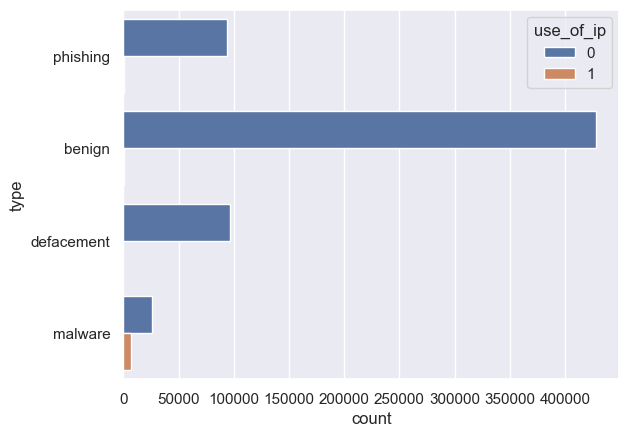

In [10]:
import seaborn as sns
sns.set(style="darkgrid")
ax = sns.countplot(y="type", data=df,hue="use_of_ip")

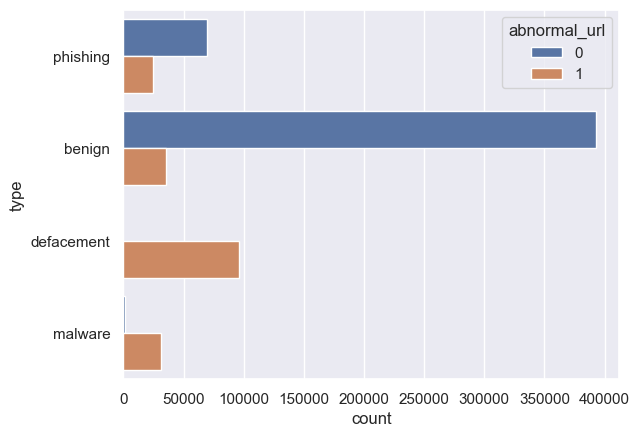

In [12]:
sns.set(style="darkgrid")
ax = sns.countplot(y="type", data=df,hue="abnormal_url")

# Distribution of count of [.] dot

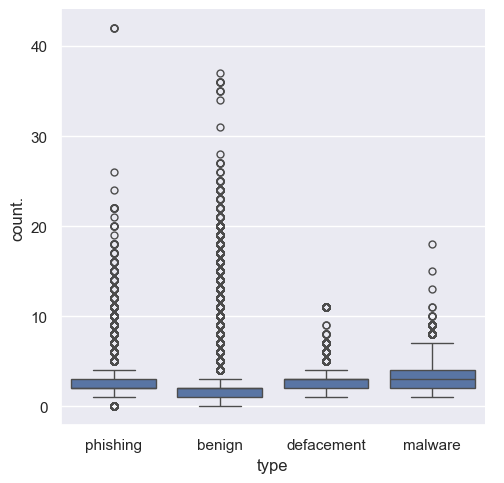

In [13]:

sns.set(style="darkgrid")
ax = sns.catplot(x="type", y="count.", kind="box", data=df)

# Distribution of count@

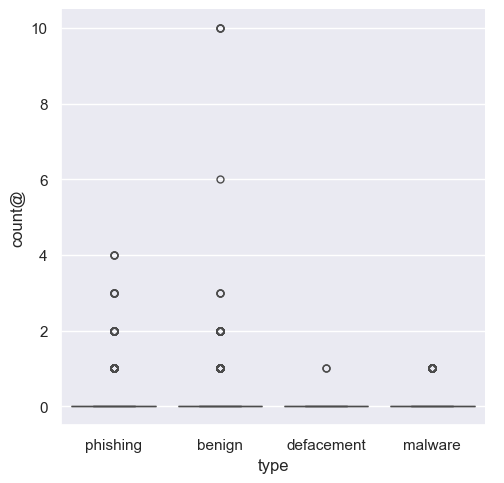

In [14]:
sns.set(style="darkgrid")
ax = sns.catplot(x="type", y="count@", kind="box", data=df)

In [15]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
df["type_code"] = lb_make.fit_transform(df["type"])
df["type_code"].value_counts()

type_code
0    428103
1     96457
3     94111
2     32520
Name: count, dtype: int64

In [16]:
X = df[['use_of_ip','abnormal_url', 'count.', 'count-www', 'count@',
       'count_dir', 'count_embed_domian', 'short_url', 'count-https',
       'count-http', 'count%', 'count?', 'count-', 'count=', 'url_length',
       'hostname_length', 'sus_url', 'fd_length', 'tld_length', 'count-digits',
       'count-letters']]

#Target Variable
y = df['type_code']


In [17]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2,shuffle=True, random_state=5)

In [18]:
X.head()

,use_of_ip,abnormal_url,count.,count-www,count@,count_dir,count_embed_domian,short_url,count-https,count-http,...,count?,count-,count=,url_length,hostname_length,sus_url,fd_length,tld_length,count-digits,count-letters
0,0,0,2,0,0,0,0,0,0,0,...,0,1,0,16,0,0,0,-1,0,13
1,0,0,2,0,0,2,0,0,0,0,...,0,0,0,35,0,0,5,-1,1,29
2,0,0,2,0,0,3,0,0,0,0,...,0,0,0,31,0,0,7,-1,1,25
3,0,1,3,1,0,1,0,0,0,1,...,1,1,4,88,21,0,9,2,7,63
4,0,1,2,0,0,1,0,0,0,1,...,1,1,3,235,23,0,9,3,22,199


In [22]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2,shuffle=True, random_state=5)

In [23]:
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100,max_features='sqrt')
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)
print(classification_report(y_test,y_pred_rf,target_names=['benign', 'defacement','phishing','malware']))

score = metrics.accuracy_score(y_test, y_pred_rf)
print("accuracy:   %0.3f" % score)

              precision    recall  f1-score   support

      benign       0.97      0.98      0.98     85621
  defacement       0.98      0.99      0.99     19292
    phishing       0.99      0.95      0.97      6504
     malware       0.91      0.86      0.88     18822

    accuracy                           0.97    130239
   macro avg       0.96      0.95      0.95    130239
weighted avg       0.97      0.97      0.97    130239

accuracy:   0.966


In [28]:
! pip install lightgbm

In [24]:
import xgboost as xgb
from lightgbm import LGBMClassifier
lgb = LGBMClassifier(objective='multiclass',boosting_type= 'gbdt',n_jobs = 5, 
          silent = True, random_state=5)
LGB_C = lgb.fit(X_train, y_train)


y_pred_lgb = LGB_C.predict(X_test)
print(classification_report(y_test,y_pred_lgb,target_names=['benign', 'defacement','phishing','malware']))

score = metrics.accuracy_score(y_test, y_pred_lgb)
print("accuracy:   %0.3f" % score)

[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.037586 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1158
[LightGBM] [Info] Number of data points in the train set: 520952, number of used features: 21
[LightGBM] [Info] Start training from score -0.419439
[LightGBM] [Info] Start training from score -1.909712
[LightGBM] [Info] Start training from score -2.996946
[LightGBM] [Info] Start training from score -1.934324
[LightGBM] [Warning] Unknown parameter: silent
              precision    recall  f1-score   support

      benign       0.97      0.99      0.98     85621
  defacement       0.96      0.99      0.98     19292
    phishing       0.97      0.90      0.93      6504
     malware       0.90      0.83      0.86     18822

    accuracy     

In [25]:
import numpy as np
def main(url):
    
    status = []
    
    status.append(having_ip_address(url))
    status.append(abnormal_url(url))
    status.append(count_dot(url))
    status.append(count_www(url))
    status.append(count_atrate(url))
    status.append(no_of_dir(url))
    status.append(no_of_embed(url))
    
    status.append(shortening_service(url))
    status.append(count_https(url))
    status.append(count_http(url))
    
    status.append(count_per(url))
    status.append(count_ques(url))
    status.append(count_hyphen(url))
    status.append(count_equal(url))
    
    status.append(url_length(url))
    status.append(hostname_length(url))
    status.append(suspicious_words(url))
    status.append(digit_count(url))
    status.append(letter_count(url))
    status.append(fd_length(url))
    tld = get_tld(url,fail_silently=True)
      
    status.append(tld_length(tld))
    
    
    

    return status


def get_prediction_from_url(test_url):
    features_test = main(test_url)
    # Due to updates to scikit-learn, we now need a 2D array as a parameter to the predict function.
    features_test = np.array(features_test).reshape((1, -1))

    

    pred = lgb.predict(features_test)
    # print(pred)
    # print(pred[0])
    if int(pred) == 0:
        
        res="SAFE"
        return res
    elif int(pred) == 1.0:
        
        res="DEFACEMENT"
        return res
    elif int(pred) == 2.0:
        res="PHISHING"
        return res
        
    elif int(pred) == 3.0:
        
        res="MALWARE"
        return res


urls = ['http://www.shaborooz.ir/index.php?view=article&catid=7:1390-01-27-09-09-55&id=23:1390-04-12-08-07-33&tmpl=component&print=1&layout=default&page=&option=com_content&Itemid=2','en.wikipedia.org/wiki/North_Dakota']
for url in urls:
     print(get_prediction_from_url(url))

[LightGBM] [Warning] Unknown parameter: silent
PHISHING
[LightGBM] [Warning] Unknown parameter: silent
SAFE


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5428\1657550429.py:49: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  if int(pred) == 0:
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5428\1657550429.py:53: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  elif int(pred) == 1.0:
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5428\1657550429.py:57: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  elif int(pred) == 2.0:
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5428\1657550429.p

# checking the accuracy using pretrained models


In [52]:
X = df[['use_of_ip','abnormal_url']]

#Target Variable
y = df['type_code']


In [55]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2,shuffle=True, random_state=5)

In [56]:
import xgboost as xgb
from lightgbm import LGBMClassifier
lgb = LGBMClassifier(objective='multiclass',boosting_type= 'gbdt',n_jobs = 5, 
          silent = True, random_state=5)
LGB_C = lgb.fit(X_train, y_train)


y_pred_lgb = LGB_C.predict(X_test)
print(classification_report(y_test,y_pred_lgb,target_names=['benign', 'defacement','phishing','malware']))

score = metrics.accuracy_score(y_test, y_pred_lgb)
print("accuracy:   %0.3f" % score)

[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012832 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4
[LightGBM] [Info] Number of data points in the train set: 520952, number of used features: 2
[LightGBM] [Info] Start training from score -0.419439
[LightGBM] [Info] Start training from score -1.909712
[LightGBM] [Info] Start training from score -2.996946
[LightGBM] [Info] Start training from score -1.934324
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits w

C:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [36]:
X = df[['use_of_ip','abnormal_url', 'count.', 'count-www', 'count@',
       'count_dir', 'count_embed_domian']]

#Target Variable
y = df['type_code']


In [37]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2,shuffle=True, random_state=5)

In [38]:
import xgboost as xgb
from lightgbm import LGBMClassifier
lgb = LGBMClassifier(objective='multiclass',boosting_type= 'gbdt',n_jobs = 5, 
          silent = True, random_state=5)
LGB_C = lgb.fit(X_train, y_train)


y_pred_lgb = LGB_C.predict(X_test)
print(classification_report(y_test,y_pred_lgb,target_names=['benign', 'defacement','phishing','malware']))

score = metrics.accuracy_score(y_test, y_pred_lgb)
print("accuracy:   %0.3f" % score)

[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016383 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 67
[LightGBM] [Info] Number of data points in the train set: 520952, number of used features: 7
[LightGBM] [Info] Start training from score -0.419439
[LightGBM] [Info] Start training from score -1.909712
[LightGBM] [Info] Start training from score -2.996946
[LightGBM] [Info] Start training from score -1.934324
[LightGBM] [Warning] Unknown parameter: silent
              precision    recall  f1-score   support

      benign       0.93      0.95      0.94     85621
  defacement       0.78      0.89      0.83     19292
    phishing       0.70      0.64      0.67      6504
     malware       0.82      0.62      0.70     18822

    accuracy        

In [19]:
X = df[['use_of_ip','abnormal_url', 'count.', 'count-www', 'count@',
       'count_dir', 'count_embed_domian', 'short_url', 'count-https',
       'count-http', 'count%', 'count?', 'count-', 'count=', 'url_length',
       'hostname_length', 'sus_url', 'fd_length', 'tld_length', 'count-digits',
       'count-letters']]
y = df['type_code']

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
dt = DecisionTreeClassifier(random_state=5)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print(classification_report(y_test, y_pred_dt, target_names=['benign', 'defacement', 'phishing', 'malware']))
score_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree accuracy:   %0.3f" % score_dt)


              precision    recall  f1-score   support

      benign       0.97      0.98      0.97     85621
  defacement       0.98      0.99      0.98     19292
    phishing       0.95      0.94      0.95      6504
     malware       0.87      0.84      0.86     18822

    accuracy                           0.96    130239
   macro avg       0.94      0.94      0.94    130239
weighted avg       0.96      0.96      0.96    130239

Decision Tree accuracy:   0.957


In [3]:

X = df[['use_of_ip','abnormal_url', 'count.', 'count-www', 'count@',
       'count_dir', 'count_embed_domian', 'short_url', 'count-https',
       'count-http', 'count%', 'count?', 'count-', 'count=', 'url_length',
       'hostname_length', 'sus_url', 'fd_length', 'tld_length', 'count-digits',
       'count-letters']]
y = df['type_code']



from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

svm_model = SVC(kernel='rbf', random_state=5)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
print(classification_report(y_test, y_pred_svm, target_names=['benign', 'defacement', 'phishing', 'malware']))
score_svm = accuracy_score(y_test, y_pred_svm)
print("SVM accuracy:   %0.3f" % score_svm)


KeyError: "None of [Index(['use_of_ip', 'abnormal_url', 'count.', 'count-www', 'count@',\n       'count_dir', 'count_embed_domian', 'short_url', 'count-https',\n       'count-http', 'count%', 'count?', 'count-', 'count=', 'url_length',\n       'hostname_length', 'sus_url', 'fd_length', 'tld_length', 'count-digits',\n       'count-letters'],\n      dtype='object')] are in the [columns]"

In [15]:
df

,url,type,use_of_ip,abnormal_url,google_index,count.,count-www,count@,count_dir,count_embed_domian,...,count-http,count%,count?,count-,count=,url_length,hostname_length,sus_url,count-digits,count-letters
0,br-icloud.com.br,phishing,0,0,1,2,0,0,0,0,...,0,0,0,1,0,16,0,0,0,13
1,mp3raid.com/music/krizz_kaliko.html,benign,0,0,1,2,0,0,2,0,...,0,0,0,0,0,35,0,0,1,29
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,0,1,2,0,0,3,0,...,0,0,0,0,0,31,0,0,1,25
3,http://www.garage-pirenne.be/index.php?option=...,defacement,0,1,1,3,1,0,1,0,...,1,0,1,1,4,88,21,0,7,63
4,http://adventure-nicaragua.net/index.php?optio...,defacement,0,1,1,2,0,0,1,0,...,1,0,1,1,3,235,23,0,22,199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing,0,0,1,3,0,0,3,0,...,0,0,0,0,0,39,0,0,12,21
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,0,0,1,2,0,0,4,0,...,0,0,0,2,0,44,0,0,7,29
651188,www.gamespot.com/xbox360/action/deadspace/,phishing,0,0,1,2,1,0,4,0,...,0,0,0,0,0,42,0,0,3,33
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,0,0,1,2,0,0,2,0,...,0,0,0,0,0,45,0,0,0,36


# Normalization

In [11]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder


features = df.drop(['type'], axis=1)  
target = df['type']  


label_encoder = LabelEncoder()
target_encoded = label_encoder.fit_transform(target)


numerical_cols = features.select_dtypes(include=['int64', 'float64']).columns
scaler = MinMaxScaler()
features[numerical_cols] = scaler.fit_transform(features[numerical_cols])


categorical_cols = features.select_dtypes(include=['object']).columns
for col in categorical_cols:
    features[col] = label_encoder.fit_transform(features[col])


normalized_data = pd.concat([features, pd.Series(target_encoded, name='type')], axis=1)
normalized_data.to_csv('normalized_dataset.csv', index=False)
print(normalized_data.head())


      url  use_of_ip  abnormal_url  google_index    count.  count-www  count@  \
0   58649        0.0           0.0           0.0  0.047619        0.0     0.0   
1  428005        0.0           0.0           0.0  0.047619        0.0     0.0   
2   57880        0.0           0.0           0.0  0.047619        0.0     0.0   
3  297900        0.0           1.0           0.0  0.071429        0.2     0.0   
4  198434        0.0           1.0           0.0  0.047619        0.0     0.0   

   count_dir  count_embed_domian  short_url  ...    count=  url_length  \
0   0.000000                 0.0        0.0  ...  0.000000    0.006900   
1   0.051282                 0.0        0.0  ...  0.000000    0.015639   
2   0.076923                 0.0        0.0  ...  0.000000    0.013799   
3   0.025641                 0.0        0.0  ...  0.078431    0.040018   
4   0.025641                 0.0        0.0  ...  0.058824    0.107636   

   hostname_length  sus_url  count-digits  count-letters  fd_length 

In [18]:

normalized_data.head()

,url,use_of_ip,abnormal_url,google_index,count.,count-www,count@,count_dir,count_embed_domian,short_url,...,count%,count?,count-,count=,url_length,hostname_length,sus_url,count-digits,count-letters,type
0,58649,0.0,0.0,0.0,0.047619,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.00,0.011494,0.000000,0.006900,0.000000,0.0,0.000000,0.006072,3
1,428005,0.0,0.0,0.0,0.047619,0.0,0.0,0.051282,0.0,0.0,...,0.0,0.00,0.000000,0.000000,0.015639,0.000000,0.0,0.000831,0.013545,0
2,57880,0.0,0.0,0.0,0.047619,0.0,0.0,0.076923,0.0,0.0,...,0.0,0.00,0.000000,0.000000,0.013799,0.000000,0.0,0.000831,0.011677,0
3,297900,0.0,1.0,0.0,0.071429,0.2,0.0,0.025641,0.0,0.0,...,0.0,0.05,0.011494,0.078431,0.040018,0.088983,0.0,0.005814,0.029426,1
4,198434,0.0,1.0,0.0,0.047619,0.0,0.0,0.025641,0.0,0.0,...,0.0,0.05,0.011494,0.058824,0.107636,0.097458,0.0,0.018272,0.092947,1


In [12]:
normalized_data['type'].unique()

array([3, 0, 1, 2])

# deep learning model design 

In [13]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


# Convert data to pandas DataFrame
df = pd.DataFrame(normalized_data)

# Features and target
X = df.drop(columns='type')  # Features
y = df['type']  # Target

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data (important for neural networks)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the Feedforward Neural Network (FNN) model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # First hidden layer
model.add(Dropout(0.2))  # Dropout layer to avoid overfitting
model.add(Dense(64, activation='relu'))  # Second hidden layer
model.add(Dropout(0.2))  # Dropout layer
model.add(Dense(1, activation='sigmoid'))  # Output layer (binary classification)

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=16, validation_data=(X_test, y_test))

# Evaluate the model on the test set
y_pred = (model.predict(X_test) > 0.5).astype('int32')

# Evaluate and print accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))



C:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
32560/32560 ━━━━━━━━━━━━━━━━━━━━ 92s 3ms/step - accuracy: 0.6110 - loss: -1392158.7500 - val_accuracy: 0.6273 - val_loss: -18232188.0000
Epoch 2/10
32560/32560 ━━━━━━━━━━━━━━━━━━━━ 91s 3ms/step - accuracy: 0.6277 - loss: -35271556.0000 - val_accuracy: 0.6275 - val_loss: -120742272.0000
Epoch 3/10
32560/32560 ━━━━━━━━━━━━━━━━━━━━ 96s 3ms/step - accuracy: 0.6296 - loss: -170619968.0000 - val_accuracy: 0.6300 - val_loss: -375333568.0000
Epoch 4/10
32560/32560 ━━━━━━━━━━━━━━━━━━━━ 97s 3ms/step - accuracy: 0.6307 - loss: -472616736.0000 - val_accuracy: 0.6299 - val_loss: -852076928.0000
Epoch 5/10
32560/32560 ━━━━━━━━━━━━━━━━━━━━ 97s 3ms/step - accuracy: 0.6287 - loss: -1009954176.0000 - val_accuracy: 0.6200 - val_loss: -1618735104.0000
Epoch 6/10
32560/32560 ━━━━━━━━━━━━━━━━━━━━ 96s 3ms/step - accuracy: 0.6198 - loss: -1830775424.0000 - val_accuracy: 0.6130 - val_loss: -2742161152.0000
Epoch 7/10
32560/32560 ━━━━━━━━━━━━━━━━━━━━ 905s 28ms/step - accuracy: 0.6111 - loss: -3078542

C:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,